In [1]:
import numpy as np
from scipy.stats import multivariate_normal, gamma, norm, bernoulli, truncnorm
from tqdm import tqdm
import pandas as pd

# %% set graphs style
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')

In [2]:
# %% Import data
df = pd.read_csv('polls.csv')
df = df.dropna()# drop rows with nan
#drop the first three columns
df = df.drop(columns=['org', 'year', 'survey'])
#get dummies
df = pd.get_dummies(df, prefix='education', prefix_sep='.', 
                            columns=['edu'])
df = pd.get_dummies(df, prefix='age', prefix_sep='.', 
                            columns=['age'])

# %% manipulate data to get design matrices
states = df.groupby('state')
st = list(states.groups.keys())
states_X = []
states_y = []
for state in st:
    df_state = states.get_group(state)
    y = df_state['bush'].to_numpy()
    #remove column name state and y
    df_state = df_state.drop(columns=['bush', 'state'])
    #get intercept and concatenate
    interc = np.ones((df_state.shape[0],1))
    rest = df_state.to_numpy()
    X = np.concatenate([interc, rest], axis=1)   
    #append to list
    states_X.append(X)
    states_y.append(y)

In [8]:
states_X

[array([[1.000e+00, 1.000e+00, 1.000e+00, 4.002e+03, 0.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [1.000e+00, 0.000e+00, 0.000e+00, 1.003e+03, 0.000e+00, 1.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [1.000e+00, 0.000e+00, 0.000e+00, 6.950e+02, 1.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [1.000e+00, 1.000e+00, 0.000e+00, 9.340e+02, 1.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
        [1.000e+00, 1.000e+00, 1.000e+00, 1.337e+03, 0.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.000e+00, 1.000e+00, 0.000e+00, 2.970e+02, 0.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [1.000e+00, 1.000e+00, 0.000e+00, 2.740e+02, 1.000e+00, 0.000e+00,
         0.000e+00,

In [3]:
from polls import Hierarchical
#%%
model = Hierarchical(states_X, states_y)
model.fit_GibbsSampler(3000, 1000)    

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [07:18<00:00,  6.85it/s]


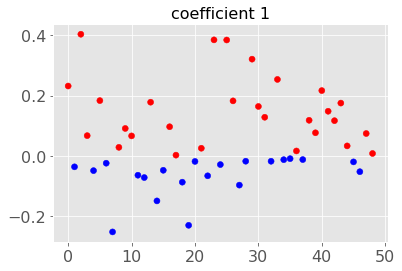

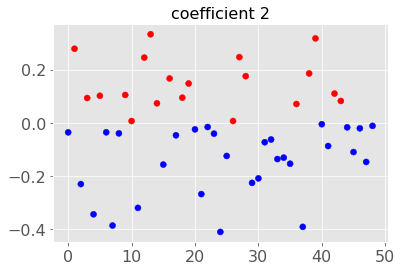

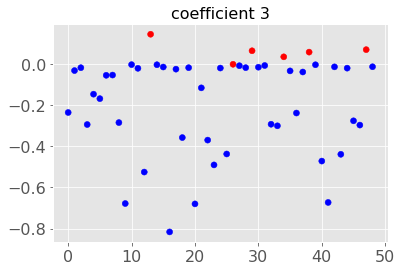

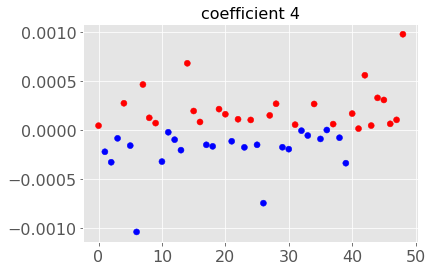

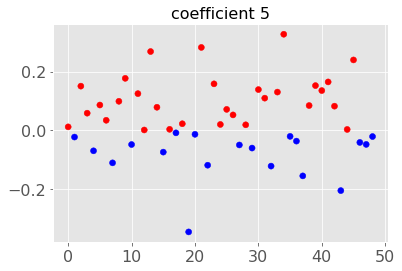

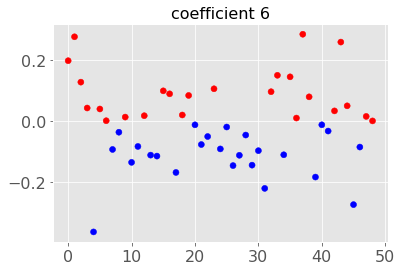

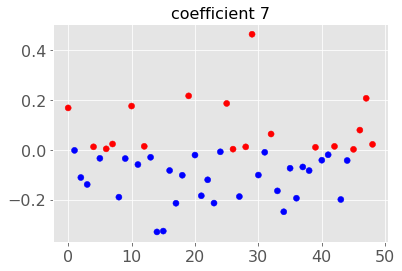

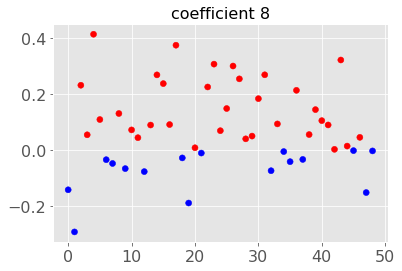

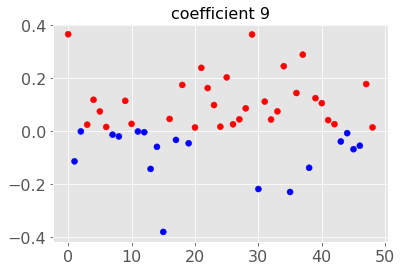

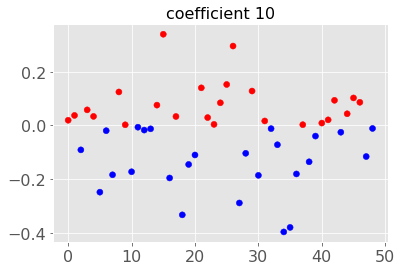

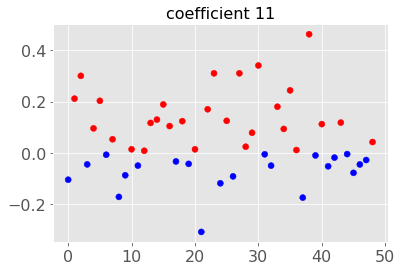

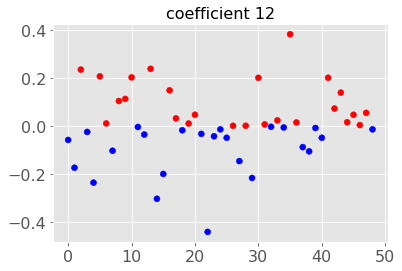

<Figure size 432x288 with 0 Axes>

In [4]:
for j in range(model._n_par):
        post_mean = np.stack(np.mean(model.traces['gammas'][:, j, :], axis = 0))
        col = np.where(post_mean<0,'b','r')
        plt.scatter(range(model._n_groups), post_mean, c=col)
        plt.title(f'coefficient {j + 1}', fontsize=16)
        plt.figure()


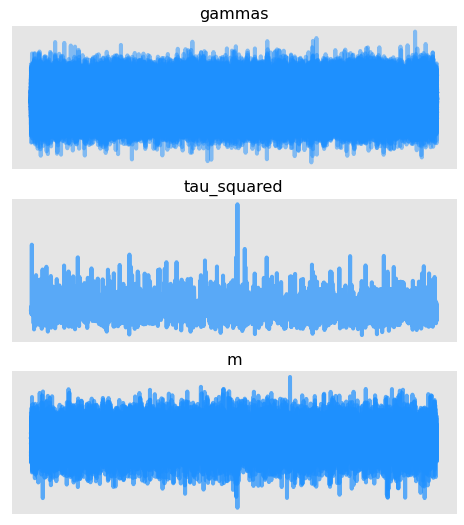

In [5]:
#model.plot_all_traces()

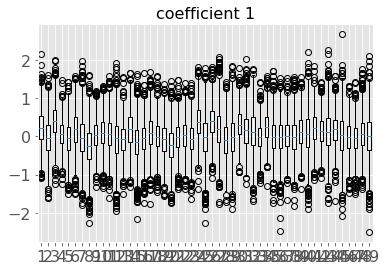

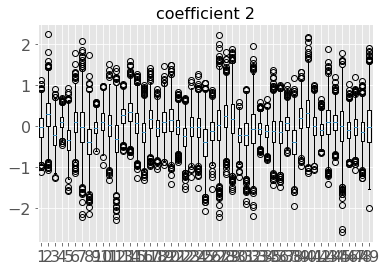

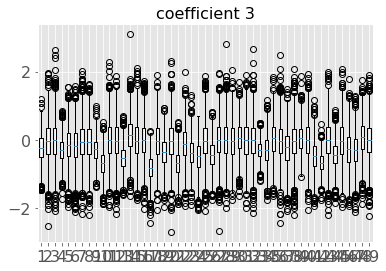

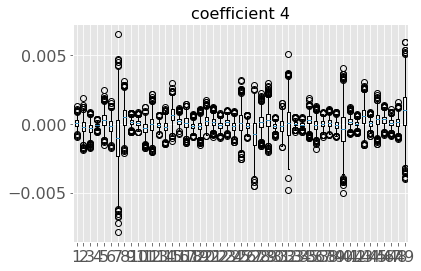

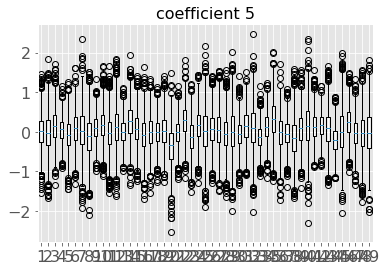

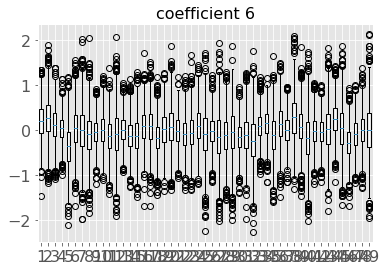

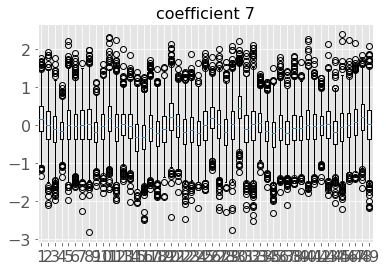

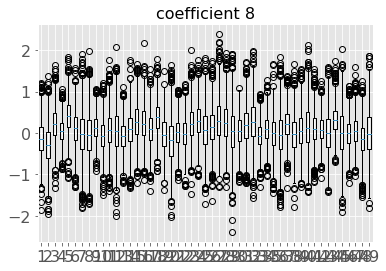

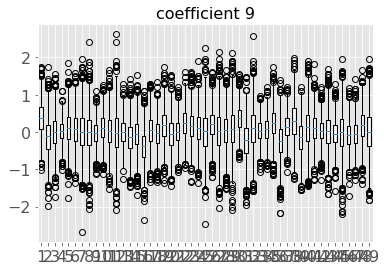

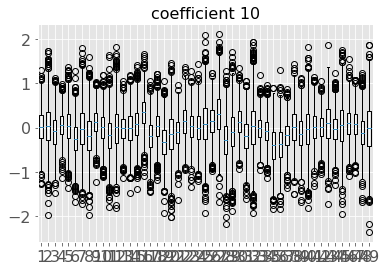

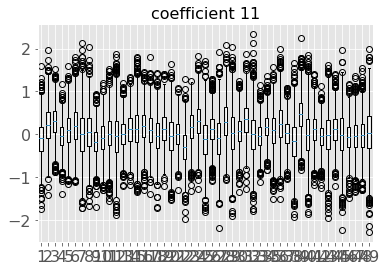

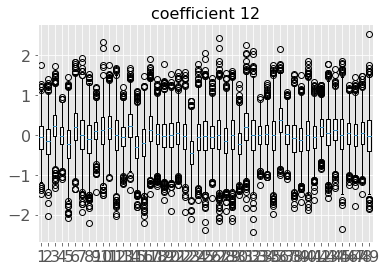

<Figure size 432x288 with 0 Axes>

In [6]:
#for j in range(model._n_par):
        #box = np.stack(model.traces['gammas'][:, j, :], axis = 0)
        #plt.boxplot(box)
        #plt.title(f'coefficient {j + 1}', fontsize=16)
        #plt.figure()

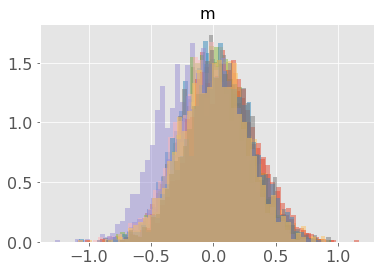

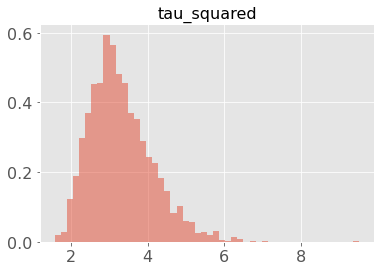

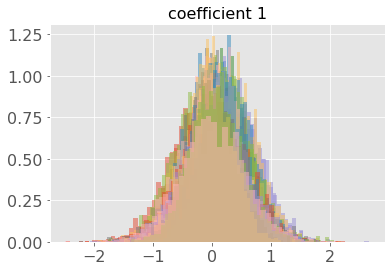

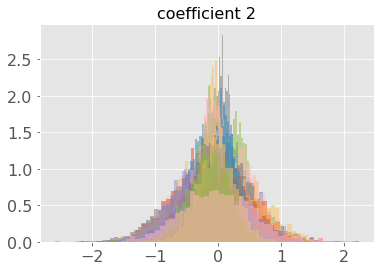

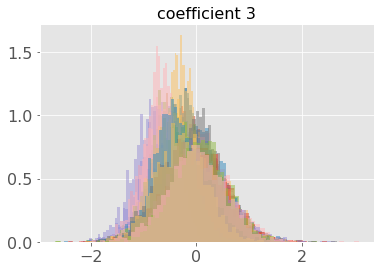

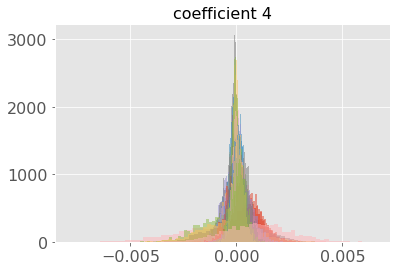

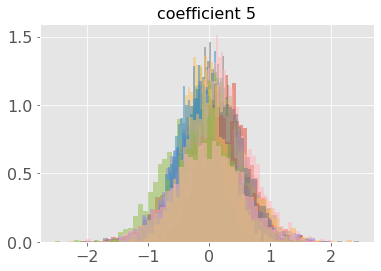

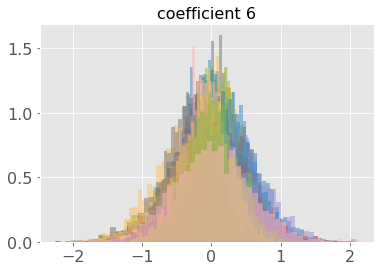

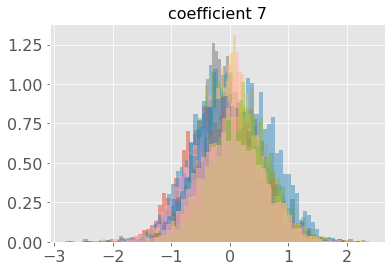

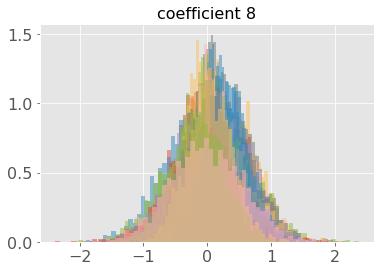

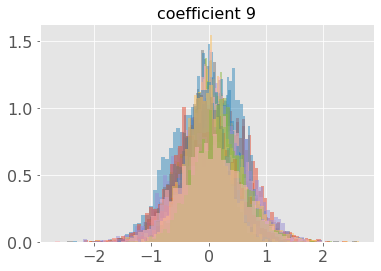

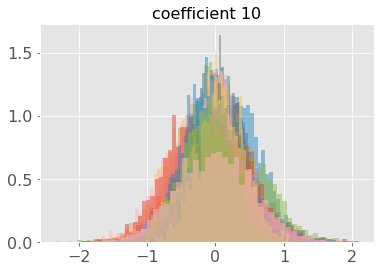

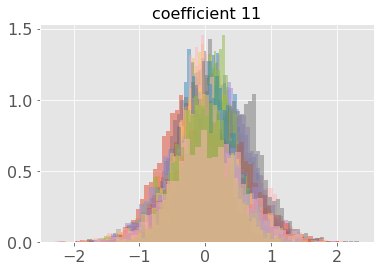

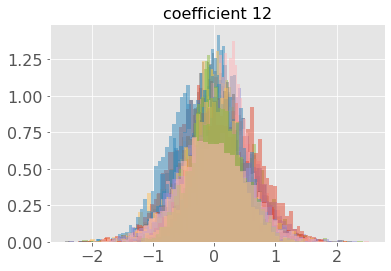

<Figure size 432x288 with 0 Axes>

In [7]:
model.plot_all_histograms()

In [ ]:
# first thing find a way to plot results with names of labels
#could get better changing tau squared
#cold do a posterior check by simulating data using the beta. (you would get y simulating where
#the mean comes summing the beta. then average it at state and see if the proportion 
#of voters in that state matches
#plot should overlap the diagonal 